In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the Dataset

In [3]:
mall_customers = pd.read_csv("/content/drive/MyDrive/Applied ML/Bonus Project/Mall_Customers.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Replacing Male with 0 and Female with 1 in the Gender Column

In [4]:
mall_customers['Gender'] = mall_customers['Gender'].replace({'Male': 0, 'Female': 1})
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Retrieving Values of the Gender, Age, Annual Income, Spending Score

In [5]:
X = mall_customers.iloc[:, 1:].values

Creating a Dendogram

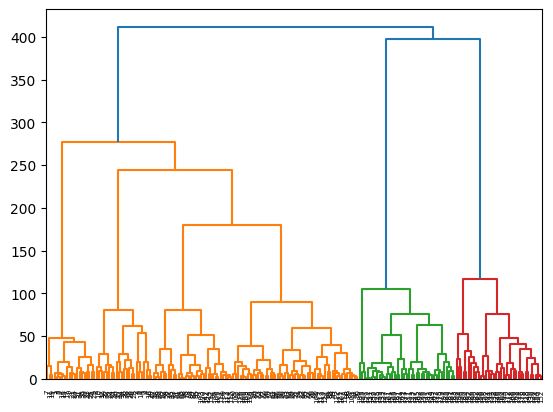

In [6]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Number of Clusters based on the Dendogram = 5

Fitting the Agglomerative Clustering Model and retrieving clusters for each instance

In [7]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels = model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


Plotting the clusters on a 3D graph

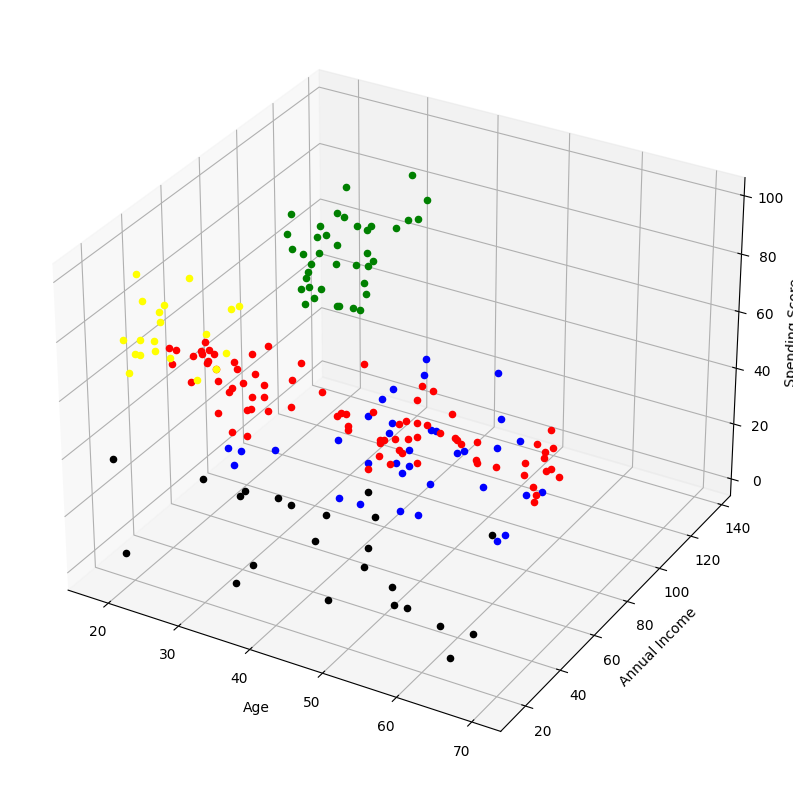

In [9]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'black']
for i in range(len(X)):
  ax.scatter(X[i][1], X[i][2], X[i][3], color=colors[labels[i]])
    
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()